<a href="https://colab.research.google.com/github/doctorpeppercokebear/computer_vision/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from tensorflow.keras.datasets import fashion_mnist

(train_input, train_target), (test_input, test_target) = fashion_mnist.load_data()



4422102/4422102 [==============================] - 0s 0us/step


In [2]:
print(len(train_input), train_input.shape)
print(train_target[0])

60000 (60000, 28, 28)
9


[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 23

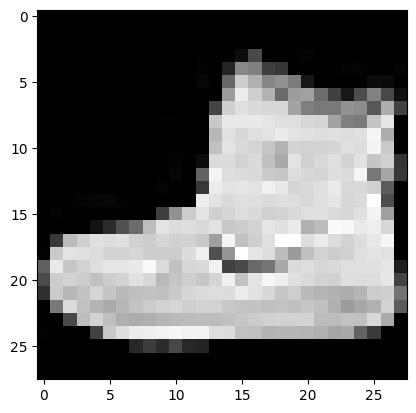

In [3]:
import matplotlib.pyplot as plt

print(train_input[0])
plt.imshow(train_input[0], cmap='gray')

plt.show()

각 픽셀은  0~ 255 사이의 값을 가진다
* 검은색은 0
* 흰색은 255
* 회색은 0 ~ 255 사이의 값

In [4]:
np.set_printoptions(linewidth=np.inf)
print(train_input[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62  54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 232 233 229 223 22

## 데이터 shape 형태 변환 및 정규화

In [5]:
train_scaled = train_input.reshape(-1,28,28,1) / 255.0    # 데이터 셋 정규화
print(train_scaled.shape)

(60000, 28, 28, 1)


In [6]:
from sklearn.model_selection import train_test_split

# 훈련 세트와 검증 세트로 분활
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target,
                                                                      test_size=0.2, random_state=42)

print(len(train_scaled))
print(len(val_scaled))

48000
12000


### 합성곱 CNN 모델 생성을 위한 keras 모듈 추가


* Sequential, Dense : layer 층 설계 및 추가
* Dropout : 과적합 방지
* Conv2D : 합성곱 연산
* MaxPooling: 풀링층

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

### 합성곱층 추가

In [8]:
model = Sequential()
model.add(Conv2D(32, kernel_size=3, activation = 'relu', padding='same', input_shape=(28,28,1)))

### 풀링층 추가

In [9]:
model.add(MaxPooling2D(2))

### 2번 째 합성곱층 추가

In [10]:
model.add(Conv2D(64, kernel_size=(3,3), activation = 'relu', padding='same'))

### 2번 째 풀링층 추가

In [11]:
model.add(MaxPooling2D(2))

### 1차원 배열로 펼치기(flatten)

In [12]:
model.add(Flatten())

### 은닉층, Dropout층 추가

In [13]:
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.4))

### 출력층 뉴런 개수 설정 및 다중 분류에 따른 '소프트 맥스' 함수 사용

In [14]:
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 100)               3

## 모델 컴파일
* 모델을 컴퓨터가 이해할 수 있도록 컴파일하고 **효과적으로 규현될 수 있도록 여러 환경을 설정**
  * optimizer: 훈렩과정 최적화
  * loss : 훈련 과정에서 사용할 손실 함수 설정(loss function), 타깃과 예측값의 오차 계산
  * metrice: 훈련을 모니터링 하기 위한 평가 지표 선택
    * ex: metrics=['accuracy']

***adam***:  

SGD (Stochastic Gradient Descent)와 RMSProp (Root Mean Square Propagation) 알고리즘의 장점을 결합하여 빠른 수렴 속도와 안정적인 학습 과정을 제공

작동방식:
1. **모델 평가**: 현재 모델 가중치를 사용하여 훈련 데이터에 대한 모델 출력을 계산하고 손실 값을 계산합니다.
2. **경사 계산**: 손실 함수에 대한 각 가중치의 편도 미분을 계산하여 현재 방향으로 얼마나 손실이 감소하는지 확인합니다.
3. **경사 누적**: 이전 단계에서 계산된 경사 값을 가중치별 누적 평균인 m으로 업데이트합니다. Adam은 SGD와 달리 단순히 이전 단계의 경사 값만 사용하는 것이 아니라 과거 경사 값들의 가중치 평균을 사용하여 학습 속도를 안정화합니다.
4. **평균 제곱 편차** 계산: 이전 단계에서 계산된 경사 값의 제곱 평균을 가중치별 누적 제곱 평균인 v으로 업데이트합니다. RMSProp과 유사하게 Adam은 과거 경사 값들의 제곱 평균을 사용하여 학습 속도를 조절합니다.
5. **가중치 업데이트**: 다음 식을 사용하여 가중치를 업데이트합니다.

***loss = 'sparse_categorical_crossentropy'***
* 다중 분류 문제에서 레이블이 정수형 범주형 데이터인 경우 사용하는 손실 함수이다.
  * 즉, 모델이 여러 개의 범주 중 하나를 예측하는 문제에서 사용된다.
    * 이미지 분류: 이미지가 고양이, 개, 말 중 어떤 동물인지 예측하는 문제
    * 감정 분석: 문장의 감정이 긍정, 부정, 중립 중 어떤지 예측하는 문제
    * 스팸 필터링: 이메일이 정상 메일인지 스팸 메일인지 예측하는 문제

**회귀:** 평균 제곱오차(MSE(Mean Squared Error)) 사용  
**분류:**
1. 크로스 엔트로피, 이진분류 -> binary_crossentropy
2. 다중 분류
  * categorical_crossentropy
  * sparse_categorical_crossentropy

In [15]:
model.compile(optimizer = 'adam',   # 모멘텀(관성) 최적화 + RMSprop(보폭) 융합으로 적응적 학습률 최적화
              loss = 'sparse_categorical_crossentropy', # 출력 데이터 y 가 원 핫 백터가 아니면서 Dense layer가 2개 이상일 때 사
              metrics = ['accuracy'])   # 매 epoch 마다 손실과 함꼐 정확도 지표 출력

## 콜백 적용
* 조기종료 : 과대적합(손실이 다시 증가되는 시점)을 막기 위해 훈련 미리 중지(에포크 제한)
  * 케라스 EarlyStopping 콜백 함수 사용
* **patience** 매개변수: 정확도가 더 이상 향상되지 않더라도 더 진행될 에포크 회수
* **retore_best_weigths** 매개변수: True 지정 시 가장 낮은 손실을 낸 모델 가중치로 복구
* **modelcheckpoinat** 와 **EarlyStopping** 함께 사용 시 최적 모델 파일로 저장하고 손실이 다시 증가될 때 미리 훈련 중지

In [20]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping # 모델 저장, 조기종료

checkpoinat_cb = ModelCheckpoint('/content/drive/MyDrive/nvidia_ai_academy/best-cnn-model.h5')   # 최적 검증 점수를 만드는 모델 자동 저장
early_stopping_cb = EarlyStopping(patience=2, restore_best_weights=True)  # 과대 적합 방지 및 , 필요하지 않은 훈련 하지 않도록 조기 종료


## 훈련 및 훈련 과정 모니터링



1.   verbose=0 : 훈련과정 출력 되지 않음
2.   verbose=0 : 훈련과정 진행막대와 손실등의 지표 출력
3.   verbose=0 : 훈련과정 진행막대와 출력을 제외한 매 epoch의 손실 정확도만 출력


In [21]:
history = model.fit(train_scaled, train_target, epochs=20, validation_data=(val_scaled, val_target), callbacks=[checkpoinat_cb, early_stopping_cb],verbose=1)

Epoch 1/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0980 - accuracy: 0.9619 - val_loss: 0.3061 - val_accuracy: 0.9207
Epoch 2/20
  34/1500 [..............................] - ETA: 4s - loss: 0.0774 - accuracy: 0.9706

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1500/1500 [==============================] - 7s 5ms/step - loss: 0.0999 - accuracy: 0.9605 - val_loss: 0.3237 - val_accuracy: 0.9264
Epoch 3/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0923 - accuracy: 0.9636 - val_loss: 0.3172 - val_accuracy: 0.9227
